<a href="https://colab.research.google.com/github/Nimo160302/Deep_Learning_Codes/blob/main/creating_multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [93]:
iris  = load_iris()

In [94]:
X =  iris.data

In [95]:
y =  iris.target.reshape(-1, 1)


In [96]:
y.shape

(150, 1)

In [97]:
np.unique(y)

array([0, 1, 2])

In [98]:
encoder  = OneHotEncoder(sparse_output =  False)
y_encoded =  encoder.fit_transform(y)

In [99]:
scaler  = StandardScaler()
x_scaled  = scaler.fit_transform(X)

In [100]:
x_train, x_test  , y_train , y_test  =  train_test_split(x_scaled,  y_encoded , test_size  = 0.2, random_state  = 42)

In [101]:
input_size  = X.shape[1]
hidden_size = 8
output_size  = 3
lr  = 0.1
epochs = 1000

In [102]:
def get_activation_fun(name):
  if name == "sigmoid":
    act  = lambda x : 1/(1 + np.exp(-x))
    deriv =  lambda x :  x*(1-x )
  elif name ==  "tanh":
    act  =  np.tanh
    deriv =  lambda x : 1 - (x**2)
  elif name  == "relu":
    act  =  lambda x : np.maximum(0,x)
    deriv =  lambda x : np.where(x>0, 1 , 0)
  elif name ==  "leaky_relu":
     act  =  lambda x : np.maximum(0.01*x,x)
     deriv =  lambda x : np.where(x>0, 1 , 0.1)
  else:
    raise ValueError("Invalid activation function name")

  return act, deriv

In [103]:
def softmax(x):
  exp_x  = np.exp(x -  np.max(x, axis =1 , keepdims = True))
  return exp_x/ np.sum(exp_x, axis  = 1 , keepdims= True)

In [104]:
def cross_entropy(y_true  ,  y_pred):
  return -np.mean(np.sum(y_true * np.log(y_pred + 1e-8),axis = 1))

In [105]:
def accuracy_score(y_true, y_pred):
  return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))

In [106]:
import numpy as np
x = [[1,2,3], [2,3,4]]
np.sum(x, axis =0 )

array([3, 5, 7])

In [111]:
def train_model(activation_name):
  activation , activation_derivative  = get_activation_fun(activation_name)
  loss_history = []
  accuracy__history = []
  #we need a weight matrix of dimension input_size by hidden_size
  # w1 , b1 from input layer to hidden layer weights
  # w2, b2 from hidden layer to output layer,
  # we have only one hidden layer , if we had more then we need more weight matrices
  w1  =  np.random.rand(input_size , hidden_size)
  b1 =  np.zeros((1, hidden_size))
  w2 =  np.random.rand(hidden_size , output_size)
  b2  =  np.zeros((1, output_size))


  for epoch in range(epochs):
    #FORWARD PASSS EQUNT
    z1  = np.dot(x_train,  w1) + b1 # z1  =  w1.x1 + b1
    a1  = activation(z1)            # a1  =  relu(z1)
    z2  = np.dot(a1 , w2  )+b2      # z2 =  a1.w2 + b2
    a2 = softmax(z2)                # a2  =  softmax(z2)


    #LOSS
    loss = cross_entropy(y_train, a2)
    loss_history.append(loss)

    #BACKWARD PASS
    dz2 = a2 - y_train
    dw2  = np.dot(a1.T, dz2)
    db2 =  np.sum(dz2,axis  = 0 , keepdims=True)

    da1 = np.dot(dz2, w2.T)
    dz1 = da1* activation_derivative(a1)
    dw1 =  np.dot(x_train.T,dz1)
    db1 = np.sum(dz1, axis =0 , keepdims=True)

    #UPDATED WEIGHTS
    w1 =  w1 - lr*dw1
    b1 =  b1  - lr*db1
    w2 = w2 - lr*dw2
    b2 =  b2  - lr*db2

  def predict(x):
    z1 = np.dot(x, w1) + b1
    a1  = activation(z1)

    z2 =  np.dot(a1, w2) + b2
    a2  = softmax(z2)

    return a2


  y_pred  = predict(x_test)
  acc = accuracy_score(y_pred , y_test)

  return (loss_history , acc)

activations = ["sigmoid", "tanh", "relu", "leaky_relu"]
plt.figure(figsize=(12, 6))
accuracies = {}


<Figure size 1200x600 with 0 Axes>

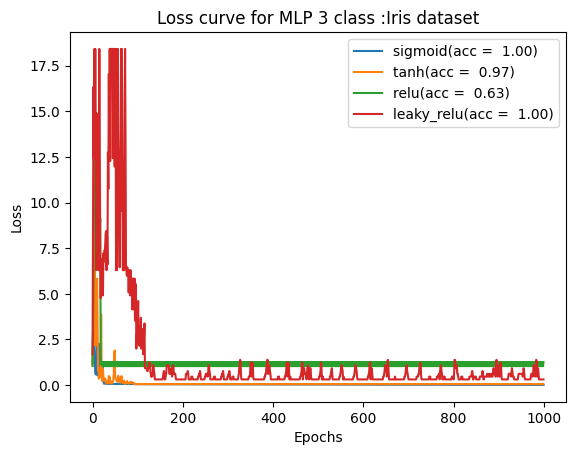

In [113]:
for act in activations:
  losses, acc =  train_model(act)
  accuracies[act] = acc
  plt.plot(losses, label = f'{act}(acc = {acc: .2f})')\

plt.title("Loss curve for MLP 3 class :Iris dataset")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
